<h1> Predicting the Gross Outcome of a Movie Using Data From IMDB </h1>

<h5> Jacob Orndoff </h5>
<h5> CMSC320 - University of Maryland, College Park </h5>
<h5> December 16th, 2022 </h5>

<h2> Table of Contents </h2>

<ol>
    <li> <a href="#introduction"> Introduction </a>
        <ul>
            <li><a href="#PLUL">Programming Language and Used Libraries</a></li>
            <li><a href="#dataset">The Dataset</a></li>
        </ul>
    </li>
    <li> <a href="#data_analysis"> Data Analysis </a>
        <ul>
            <li><a href="#release_year">Release Year</a></li>
            <li><a href="#genre">Genre</a></li>
            <li><a href="#rating">Rating</a></li>
            <li><a href="#runtime">Runtime</a></li>
            <li><a href="#budget">Budget</a></li>
        </ul>
    </li>
    <li> <a href="#model_creation"> Overall Hypothesis and Full Linear Model</a>
        <ul>
            <li><a href="#setup">Hypothesis and Model Setup</a></li>
            <li><a href="#evaluation">Model Evaluation</a></li>
        </ul>
    </li>
    <li> <a href="#conclusions"> Conclusions </a>
        <ul>
            <li><a href="#examples">Examples of Using The Linear Model</a></li>
            <li><a href="#insights">Insights Gained and Closer</a></li>
        </ul>
    </li>
</ol>

<h2 id="introduction">Introduction </h2>

<p>In 2018 alone, nearly <a href="https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/">900 movies were released in the United States and Canada.</a> With so many movies, the film industry is incredibly competitive and businesses are constantly trying to find the formula for making successful movies. New trends and a constantly evolving world can make this very difficult but using data science techniques, it's possible. Looking at how past movies performed and which of their specific attributes may have lead to their success can aid businesses with getting an idea of the projected gross of a movie they're planning to make. This can clearly be very useful for a couple of reasons including businesses can have data on projected gross of their movies for shareholders and in their future plans, they can pivot away from films that look like they will be unsuccessful and instead use their resources on higher predicted gross films.  </p>

<p>In this tutorial, we will be going through an example of what was explained above. The goal is to analyze data on previous movies and their success in order to develop a mathmatical model to help us predict the gross of new and upcoming movies. Then we can evaluate the model and it's predictions to see how well it's performed which can give us an idea on how to develop an even better one.</p>

<h4 id="PLUL">Programming Language and Used Libraries </h4>

<p>Before getting into it, a few things should be explained. To begin, during the entirity of this tutorial, all coding will be done in Python 3.10. If interested, more information on Python can be found <a href="https://www.python.org/">here</a>. Next up, we should talk about which packages will be used. Down below is the import list but it's good to highlight the general use of each one. First is <a href="https://matplotlib.org/">matplotlib</a> which will be used for graphs, plots, and general visualizations of our data. Next is <a href="https://numpy.org/">numpy</a> which is just common package used to ease scientific computing. Then there is <a href="https://pandas.pydata.org/">pandas</a> which is an incredibly important package as it helps handle data analysis and data manipulation. We'll be using pandas to read in the dataset we will be using and to manipulate the data to get some important information out of it. We also have <a href="https://seaborn.pydata.org/">seaborn</a> which is another statistical data visualization package. It's very similar to matplotlib and we will be using them in conjungtion in order to make the plots of our data look a little better. Second to last, we have <a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> which will be the main package we use to develop our mathmatical model. And finally, we import the <a href="https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.abline_plot.html">abline_plot</a> method from the statsmodels.graphics.regressionplots module in order to plot our "line of best fit" on our scatter plots we will be using.</p>

<p> The import list is below: </p>

In [94]:
# All imports for the project

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

<h4 id="dataset">The Dataset</h4>

<p>The last thing to introduce before we get into actual data analysis is the dataset. The dataset we will be using for this project comes from <a href="https://www.kaggle.com/">Kaggle.com</a> which is an online community platform for data scientists and those alike. The dataset we're using can be found <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies">here</a> and is title "Movie Industry". It is a compilation of nearly four decades of movies data from IMDB with nearly ~7700 movies in total, 220 movies per year from 1986-2020. For ease of use, the dataset has been downloaded into a csv which you can do yourself after creating an account on Kaggle. Using the pandas method <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">pandas.read_csv</a>, let's load in the dataset and get an idea of what it looks like.</p>

In [95]:
# Loading in the dataset into a Pandas Dataframe named movie_data, getting the dimensions of the dataframe using the
# df.shape method, and printing out the first 5 films.

movie_data = pd.read_csv("movies.csv")

print("The shape of the dataset is:", movie_data.shape)

movie_data.head()

The shape of the dataset is: (7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<p> From this output, we can see a couple of things. First, using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.Dataframe.shape</a> method, we get the dimensions of the dataset which is 7668 by 15. This essentially means that wae have 7668 entries and each entry has 15 columns (or 7668 movies each having 15 attributes for our situation). Then, using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html">pandas.Dataframe.head</a> method, we see the first 5 movies of the dataset and the 15 attributes for each one. </p>

<p>Using pandas.Dataframe.head, we can see what the column values actually are. We having "name" which is the movies name, "rating" which is the movies rating, "genre" which is it's main genre, "year" which is the release year for the movie, "released" which is the exact data and place of when and where the movie was released, "score" which is the movies IMDB score, "votes" which is the number of IMDB user votes, "director" which is the movies director, "writer" which is the movies main writer, "star" which is the movies main star, "country" which is the movies country of origin, "budget" which is the budget of the movie, "gross" which is the movies net revenue, "company" which is the production company for the movie, and last but not least "runtime" which is the duration of the movie. </p>

<p> So, as we can see above, for the first movie we have "The Shining" which we can see from the name column. It's R rated, it's main genre is Drama, and it was released in the year 1980 on June 13th. It's IMDB score is 8.4 with 927,000 user votes. It's directed by Stanley Kubrick, written by Stephen King, and is staring Jack Nicholson. It's country of origin is the United Kingdom. Then we see it's budget was 19,000,000 dollars and it's gross revenue was 46,998,772 dollars at the time the data was pulled. Finally, it was produced by Warner Brothers and has a runtime of 146 minutes. Hopefully with this runthrough, you've gotten a solid idea of what the dataset looks like and what values we'll be dealing with here.</p>

<p>For the purposes of this project, we'll only be dealing with a couple of these attributes. When it comes to making a movie, a business will want to focus on what it can control in order to make the most successful movie. Thus, for this project, we'll only be focused on the "rating", "genre", "runtime", and "budget" columns, which will be our independent variables, and how they affect the "gross" column, which will be our dependent variable. We will also be first taking a look at the "year" column to get an idea of how average gross has changed over time. At the end of the day, we're looking to find a relationship between our dependent and independent variables in order to see what type of movie a business should make if they want to be the most profitable. Businesses can also control a lot of the other attributes including time of year of release, director, writer, main stars, and the production company and data analysis can certainly be done on those factors as well, but to keep it simpler, we'll be focusing on the factors that affect choosing what type of movie will be made and the budget required for such a movie. </p>

<h2 id="data_analysis">Data Analysis</h2>

<p>In this portion of the tutorial, we will be going through some data analysis in order to explore for possible correlations in our data. Before we begin, it's important to look at the average gross of all the movies across the dataset to get a good idea of what a "good" gross is. Obviously a net positive revenue is overall good no matter what but as we can see here: </p>

In [96]:
# Calulculating the minimum gross of all of the data and printing it.

print("The minimum gross of all the movies is:", movie_data["gross"].min())

The minimum gross of all the movies is: 309.0


The minimum gross of all of the movies in the dataset is 309 dollars. This means that all the data has a net positive revenue and instead of just looking at how high above 0 the gross of a movie is, we can use the average to gaige if a gross is "above average" or "good" compared to others. So, using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">pandas.DataFrame.mean</a> method, we find:

In [97]:
# Calulculating the mean gross of all of the data and printing it.

print("The average movie gross from our dataset is:", movie_data["gross"].mean())

The average movie gross from our dataset is: 78500541.01778312


<p> The mean movie gross is 78,500,541 dollars which is about 75 million or 0.75 * 1e8 in scientific notation. It's important to note the scientific notation as that's what the plot's will use in order to show gross. </p>

<p>Now that we know the average, we can go on and do some actual data analysis. For the rest of this section, there will be a general flow to it. We will be going each independent variable one by one to see how much they impact the gross of a movie. When going through each one, we will be creating a plot that best fits the type of independent variable (i.e. scatter or bar plots) which shows the independent variable vs gross. This will give us a visualization of our data. Then we will be using the <a href="https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html">statsmodels Ordinary Least Squares (OLS)</a> method to build a general linear regression model based just on the single independent variable and the gross. This is not quite the big overall model that will be built towards the end, but it's one that can show us how much just that one single independent variable affects the gross and if a relationship exists between the two. So, we will be proposing a null hypothesis for it, that is, there is no relationship between the independent variable and gross, and looking to see if we can reject that null hypothesis. Let's get into it. </p>

<h4 id="release_year"> Release Year </h4>

<p>Like I had originally mentioned, let's first look at the average gross by release year. This will give us a good idea of how the movie industry has progressed and how much inflation has impacted the industry. First, we need to look at a plot of the average gross of movies from each year. This can easily be calculated for each year using the two pandas methods <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">pandas.DataFrame.groupby</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">pandas.DataFrame.mean</a> methods. We will take the entire dataset, group it by year, and take the average gross of each group. Then, using matplotlib, we can plot this to see how average gross has changed over time. Also plotted in a linear regression line or "line of best fit" for our data. This comes from the linear regression that will be talked about after we go over the plot but it's good to see it with the data. The code and plot are down below:</p>

[]

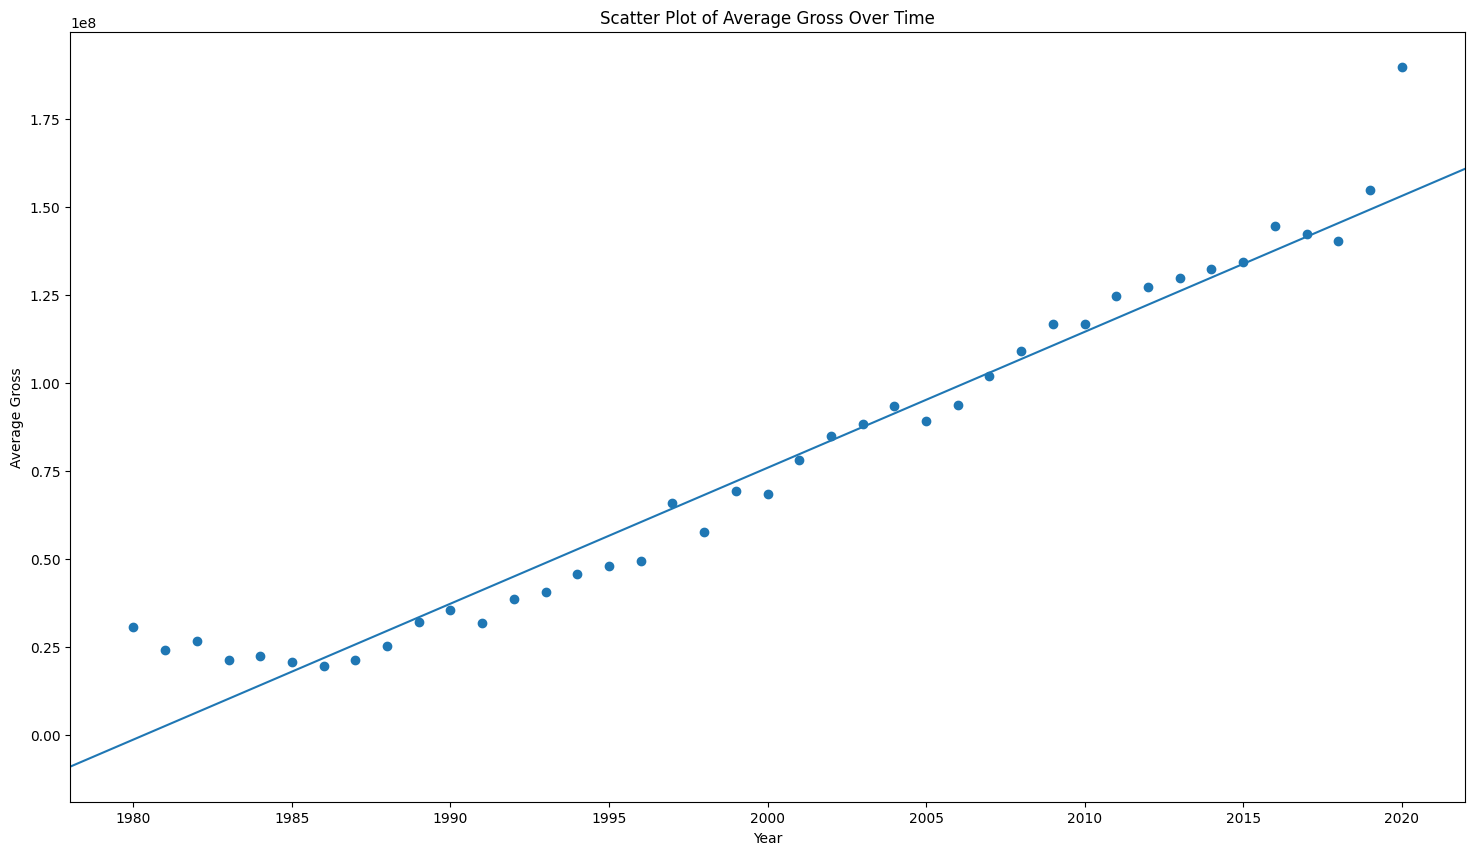

In [98]:
# Taking a look at average gross over time.

# Grouping the data set by "year" and taking the mean "gross" of each group.
average_gross_per_year = movie_data.groupby("year")["gross"].mean()

# Setting the size of the upcoming plot
fig, ax1 = plt.subplots(figsize=(18,10))

# Creating a scatter plot using the year as the x value and the average gross for that year as the y value.
ax1.scatter(average_gross_per_year.index, average_gross_per_year.values)

# Setting plot labels
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Gross")
ax1.set_title("Scatter Plot of Average Gross Over Time")

# Creating and plotting our linear regression line
year_model = smf.ols(formula="gross ~ year", data=movie_data)
abline_plot(model_results=year_model.fit(), ax=ax1)

# Showing the plot
plt.plot()

<p>As we can see, average gross has incresed over time. There looks to be a direct correlation between the two as when time goes on, average gross goes up.As there is of course inflation over time, it's good to see if this is just an effect of inflation or if more money is really being made from the film industry as time goes on. From research, we know that from 1990 to today, there's been an <a href="https://www.in2013dollars.com/us/inflation/1990?amount=1#:~:text=The%20dollar%20had%20an%20average,Labor%20Statistics%20consumer%20price%20index.">average inflation rate of 2.61 percent per year.</a> Using an actual <a href="https://www.bls.gov/data/inflation_calculator.htm">inflation calculator</a> we can see if our data has increased by more than that inflation rate. Let's take 1990 and 2015 as our two points of reference. Using some code from pandas, we can pull their average gross:</p>

In [99]:
# Finding 1990's and 2015's average gross using pandas.DataFrame.loc and printing it
print("1990's average gross was:", average_gross_per_year.loc[1990])
print("2015's average gross was:", average_gross_per_year.loc[2015])

1990's average gross was: 35624271.518324606
2015's average gross was: 134402065.76884422


<p>So as we can see, 1990's average gross was 35,624,271 dollars and 2015's was 134,402,065 dollars. Using the inflation calculator on 1990's value we find that ~36 million in 1990 equats to ~65 million in 2015. Since our 2015 value is over two times that amount, we can say that with taking inflation into account, average movie gross increased by over 200% from 1990 to 2015. That's about a 4% increase in average gross per year. That's extremely signficant and it's evidence that a relationship exists between average gross and year even when taking inflation into account.</p>

<p>Now that we've visualized our average gross over time and gotten a sense of what the relationship between the two may be, let's do a linear regression on the data of just the gross vs year to see if something is really going on. In case you're unfamiliar with what a linear regression is, the general idea is that a linear regression is used to predict the value of a variable (in our case, gross) based on the value of another variable (in this case, release year). Like I said before, this is where the line of best fit comes from on our plot. It's important to note the type of method we use to calculate our linear regression. We will be using the Ordinary Least Squares method which is the general method for calculating this sort of regression. Since our various independent variables are of different type and will have different effects on error, Ordinary Least Squares is the method to go for but it's of note that our regression will then not be as "good" or best fitting to our data as it won't be the best regression for each variable.</p>

<p> Finally, it's important to state our null hypothesis for this analysis. More information on what a null hypothesis is can be found <a href="https://en.wikipedia.org/wiki/Null_hypothesis">here</a> but in general, we go for a null hypothesis as the relationship between the average gross and year may remain unclear but the fact of the matter is, we want to know if at least some kind of relationship exists. The null hypothesis states that there is no relationship between you indepdent variable and dependent variable so if we can reject that, we can say that at least some kind of relationship exists. Thus, our null hypothesis is that no relationship exists between gross and year and our goal is to reject said null hypothesis. </p>

<p>For the actual code, like I said, we will be using the <a href="https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html">statsmodel.formula.api ols</a> method. We are looking for the relationship between gross and release year so we are setting up the formula to essentially say gross equals some multiple of the year, and we are fitting it to our movie data. Then the summary of the regression is printed below.</p>

In [100]:
# Setting up our release year model, fitting our data, and printing our summary.
year_model = smf.ols(formula="gross ~ year", data=movie_data).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     530.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.50e-113
Time:                        23:43:23   Log-Likelihood:            -1.5190e+05
No. Observations:                7479   AIC:                         3.038e+05
Df Residuals:                    7477   BIC:                         3.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.644e+09   3.35e+08    -22.807      0.000    -8.3e+09   -6.99e+09
year         3.86e+06   1.68e+05     23.042      0.000    3.53e+06    4.19e+06
==============================================================================
Omnibus:                     7884.614   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           710466.456
Skew:                           5.213   Prob(JB):                         0.00
Kurtosis:                      49.596   Cond. No.                     3.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>There's a lot of values here so let's focus on just the important ones. First, in the second "section" we can see the "coef" column for Intercept and year. To break in down simply, we can use these values to form our linear equation that best fits our data. That is, our regression says that the gross of a movie equals 3,680,000 times the year minus 7,644,000,000. This is in general, good to use for our line of best fit but our end model we create will not rely on just the release year so we won't be using these values in the end. The real important part of this summary is the "Prob (F-statistic)" value towards the top right. This value tells us the likelihood that no relationship exists between gross and year. That's exactly our null hypothesis. If the value was 0, that means that there is a 0% chance that no relationship exists. Our value here is 1.50e-113 which is incredibly close to 0 and that means there is a 1.50e-113 percent chance no relationship exists. This means that we can comfortably reject our null hypothesis and say that a relationship definitely exists between release year and gross revenue of a movie. Thus, in our end model, we will need to have the release year involved.</p>

<p> For the next couple independent variables we look at, we will be doing the same thing as we did here. As the general flow and ideas were explained here, the remaining sections for data analysis will be briefer but we will still point out our key results. </p>

<h4 id="genre"> Genre </h4>

<p>For analyzing genre, things are a little different. We don't have to necessarily take inflation into account and when looking at genre, genre is not numerical. Because of this, genre isn't something that "increases" or 'decreases". Thus, for genre, we will be using a bar graph to visualize each genre's average gross and variation. We will again be using Ordinary Least Squares to do our regression and we will be analyzing the summary for it.</p>

<p>As genre is not numerical, the overall goal is not to see some kind of change over say something like time but instead to see if average gross is higher or lower for specific genres. For this plot, we will be using seaborn to plot as it looks better and does some of behind the scenes work for us. That is, with one line of code, seaborn will group the data by genre, calculate the average gross for each group, and then create a bar plot that shows the average gross for each genre and their range of values. The range of values is the black line you see and that just shows the range in which a genres gross values lie. The code and visual is below:</p>

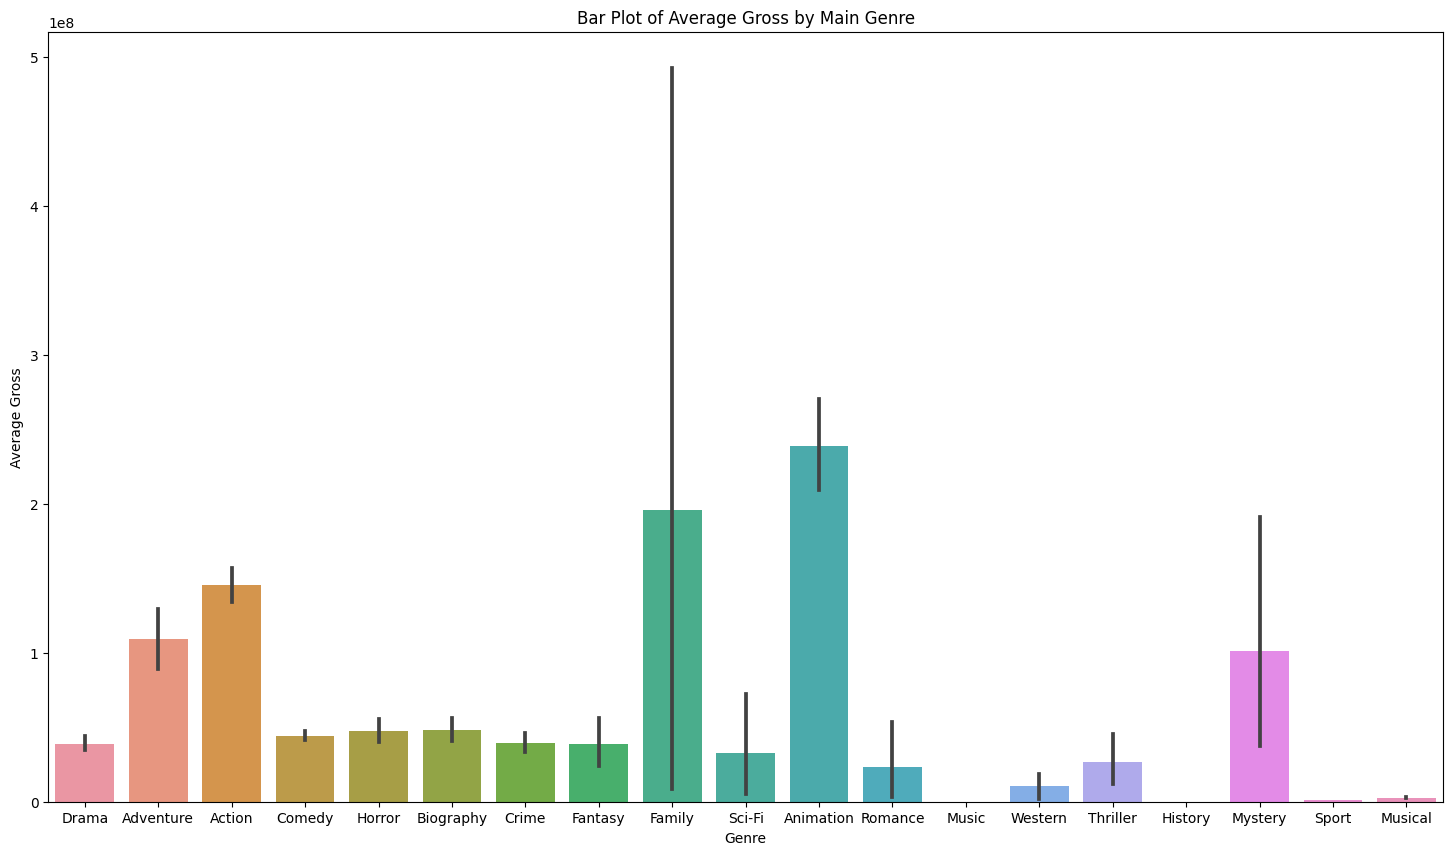

In [101]:
# Taking a look at average gross by main genre

# Setting the size of our plot
fig, ax2 = plt.subplots(figsize=(18,10))

# Using seaborn to obtain the average gross per genre and to plot it
sns.barplot(data=movie_data, x="genre", y="gross")

# Setting labels for the plot
ax2.set_xlabel("Genre")
ax2.set_ylabel("Average Gross")
ax2.set_title("Bar Plot of Average Gross by Main Genre")

# Showing the plot
plt.show()


<p>From this, we see a couple of things as we did with release year. First, we see that Animation has the highest average gross with Music/History having the lowest average gross. This means that if a business was going to create a movie, they should look to create an animated movie and if not an animated movie, then a Family movie, then an Action movie, and so on. The Animation, Family, Action, and Adventure average gross are all above the average value of 0.75e8 so they are all good choice. There is reason to say here that perhaps creating a Family movie is better than an animated one as from it's range above, it has the highest maximum value, but a counter argument to that is that it also has the lowest minimum value. At the end of the day, a business would have to make a call on either going with the low risk, medium reward route with animation or going the medium risk, high reward route with Family but at least with this data analysis, they would know that choosing one of those decisions would net a solid gross revenue. </p>

<p>Second we see that clearly, each genre's average is not the same. This is evidence that the gross of a movie is dependent on it's genre which makes sense as some genres are more popular than others. But this is just evidence. Now that we see that it's likely, we should create another linear regression with genre as our independent variable and gross as our dependent variable like we did above with release year. We will also be creating a similar null hypothesis stating that there is no relationship between a movie's genre and it's gross, and also looking to reject that null hypothesis. Following that below:</p>

In [102]:
# Setting up our genre model, fitting our data, and printing our summary.
genre_model = smf.ols(formula="gross ~ genre", data=movie_data).fit()
genre_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     56.15
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          3.21e-180
Time:                        23:43:24   Log-Likelihood:            -1.5171e+05
No. Observations:                7479   AIC:                         3.035e+05
Df Residuals:                    7461   BIC:                         3.036e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.455e+08   3.82e+06     38.098      0.000    1.38e+08    1.53e+08
genre[T.Adventure] -3.618e+07   8.53e+06     -4.244      0.000   -5.29e+07   -1.95e+07
genre[T.Animation]  9.372e+07   9.35e+06     10.023      0.000    7.54e+07    1.12e+08
genre[T.Biography] -9.763e+07   8.42e+06    -11.591      0.000   -1.14e+08   -8.11e+07
genre[T.Comedy]    -1.012e+08   5.07e+06    -19.950      0.000   -1.11e+08   -9.12e+07
genre[T.Crime]     -1.061e+08   7.72e+06    -13.743      0.000   -1.21e+08    -9.1e+07
genre[T.Drama]     -1.066e+08   5.59e+06    -19.077      0.000   -1.18e+08   -9.56e+07
genre[T.Family]     5.066e+07   4.73e+07      1.072      0.284    -4.2e+07    1.43e+08
genre[T.Fantasy]   -1.068e+08   2.41e+07     -4.426      0.000   -1.54e+08   -5.95e+07
genre[T.History]    1.068e-07   6.69e-08      1.596      0.110   -2.43e-08    2.38e-07
genre[T.Horror]    -9.814e+07    9.7e+06    -10.118      0.000   -1.17e+08   -7.91e+07
genre[T.Music]     -1.454e+08   1.56e+08     -0.930      0.352   -4.52e+08    1.61e+08
genre[T.Musical]   -1.429e+08   1.11e+08     -1.293      0.196    -3.6e+08    7.38e+07
genre[T.Mystery]   -4.433e+07   3.51e+07     -1.261      0.207   -1.13e+08    2.46e+07
genre[T.Romance]    -1.22e+08   5.54e+07     -2.203      0.028    -2.3e+08   -1.34e+07
genre[T.Sci-Fi]    -1.129e+08   5.54e+07     -2.040      0.041   -2.21e+08   -4.42e+06
genre[T.Sport]     -1.444e+08   1.56e+08     -0.924      0.355   -4.51e+08    1.62e+08
genre[T.Thriller]  -1.186e+08   4.53e+07     -2.620      0.009   -2.07e+08   -2.99e+07
genre[T.Western]   -1.348e+08   9.03e+07     -1.494      0.135   -3.12e+08    4.21e+07
==============================================================================
Omnibus:                     7881.335   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779800.722
Skew:                           5.167   Prob(JB):                         0.00
Kurtosis:                      51.945   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<p>As we can see with this summary, there's a lot more values with coefficients. This is because again, genre is not numerical, and because of that, each individual genre has it's own linear regression. In a simpler sense, to calculate a movie's gross based on genre, you take the intercept, which is 1,455,000,000 and add the genre's coefficient (or subtract if it's negative). Again, as our model will encompass multiple independent variables and so this is not majorly important but it's good to know for getting an idea on the data. What is mostly important again is the "Prob (F-statistic)" which is 3.21e-180. As this is also extrememly close to 0 as it was with release year, we can comfortably reject the null hypothesis and we will be looking to include it in our final model.</p>

<h4 id="rating"> Rating </h4>

<p>Rating is pretty much the same as genre as it's also not numerical. We will again be looking to see the average gross for each rating and the range of values for each range to get an idea on if a relationship exists and what a business would likely do if they were producing a movie. We are also again using seaborn to do our plotting. With the code and plot below:</p>

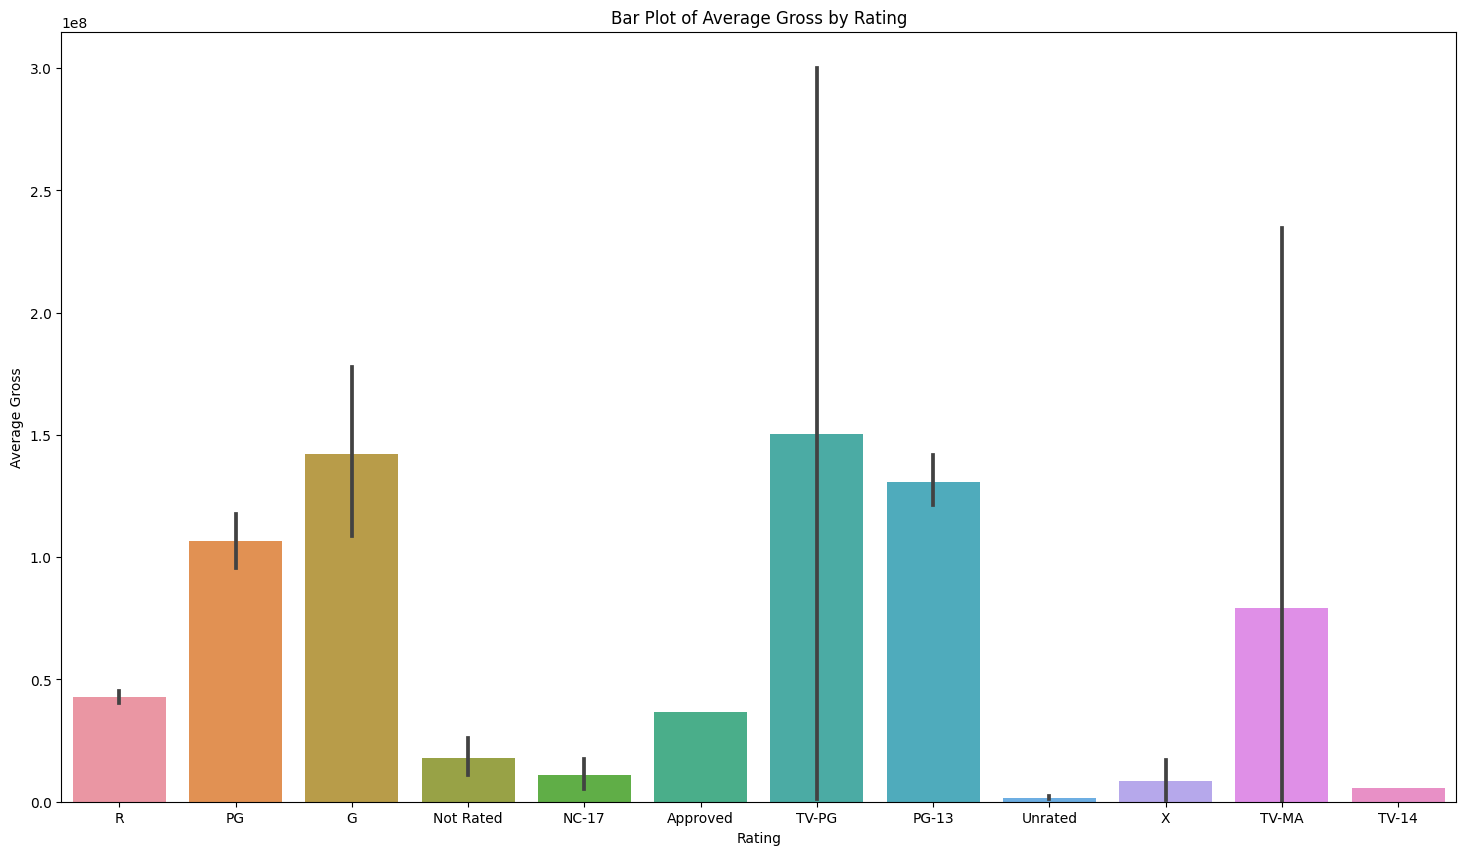

In [103]:
# Taking a look at average gross by rating

# Setting the size of our plot
fig, ax3 = plt.subplots(figsize=(18,10))

# Using seaborn to obtain the average gross per rating and to plot it
sns.barplot(data=movie_data, x="rating", y="gross")

# Setting labels for the plot
ax3.set_xlabel("Rating")
ax3.set_ylabel("Average Gross")
ax3.set_title("Bar Plot of Average Gross by Rating")

# Showing the plot
plt.show()

<p>We again see a very similar plot to the Genre one. Each rating has a very different average gross and range of values which is evidence to believe that there exists a relationship between rating and gross. When it comes to creating a movie, you'd be looking to go for TV-PG, G, or PG-13 with TV-PG having the highest risk with the largest range of values but also having the highest average gross and highest maximum gross. Picking any of the TV-PG, PG-13, G, PG, or TV-MA ratings is in general considered good as they are all above the 0.75e8 average gross. Unrated movies have the lowest average and do not perform well at all. Going back to the relationship between rating and gross, we will create another linear regression with the same null hypothesis, there is no relationship between rating and genre. Creating said linear regression we get:</p>

In [104]:
# Setting up our rating model, fitting our data, and printing our summary.
rating_model = smf.ols(formula="gross ~ rating", data=movie_data).fit()
rating_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     46.88
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          5.80e-100
Time:                        23:43:25   Log-Likelihood:            -1.5083e+05
No. Observations:                7425   AIC:                         3.017e+05
Df Residuals:                    7413   BIC:                         3.018e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.657e+07   1.61e+08      0.227      0.820   -2.79e+08    3.52e+08
rating[T.G]          1.055e+08   1.61e+08      0.654      0.513   -2.11e+08    4.22e+08
rating[T.NC-17]      -2.58e+07   1.64e+08     -0.157      0.875   -3.48e+08    2.96e+08
rating[T.Not Rated] -1.877e+07   1.61e+08     -0.117      0.907   -3.34e+08    2.97e+08
rating[T.PG]         6.988e+07   1.61e+08      0.435      0.664   -2.45e+08    3.85e+08
rating[T.PG-13]      9.431e+07   1.61e+08      0.587      0.557   -2.21e+08    4.09e+08
rating[T.R]          6.104e+06   1.61e+08      0.038      0.970   -3.09e+08    3.21e+08
rating[T.TV-14]     -3.081e+07   2.27e+08     -0.136      0.892   -4.76e+08    4.15e+08
rating[T.TV-MA]      4.261e+07   1.69e+08      0.251      0.801    -2.9e+08    3.75e+08
rating[T.TV-PG]      1.138e+08    1.8e+08      0.633      0.527   -2.38e+08    4.66e+08
rating[T.Unrated]   -3.496e+07   1.62e+08     -0.215      0.830   -3.53e+08    2.83e+08
rating[T.X]         -2.808e+07   1.86e+08     -0.151      0.880   -3.92e+08    3.36e+08
==============================================================================
Omnibus:                     7812.644   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692716.719
Skew:                           5.202   Prob(JB):                         0.00
Kurtosis:                      49.161   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>We see that rating follows the same scheme as genre, where in order to find a movie's gross with this linear regression, we take the intercept and add (or subtract if negative) by the rating's coefficient. Then, again looking at the "Prob (F-statistic)" we see it is 5.8e-100 which is also close to 0 and we can comfortably reject our null hypothesis. So for rating as well, we will be including it in our end model.</p>

<h4 id="runtime"> Runtime </h4>

<p>Runtime is similar to release year and we will be going back to a scatter plot to better represent our data. We will also be returning to just usign matplotlib to plot our data and using the pandas.DataFrame.groupby method to get our average gross per runtime group. As there is a lot of different runtimes, there will be a lot more points on our plot but the amount is just good enough to get a better idea on how runtime affect gross but not too much as to where it's not easy to interpret or visualize. We will also be adding a line of best fit to this graph as well as it's also a scatter plot. Creating our plot below:</p>

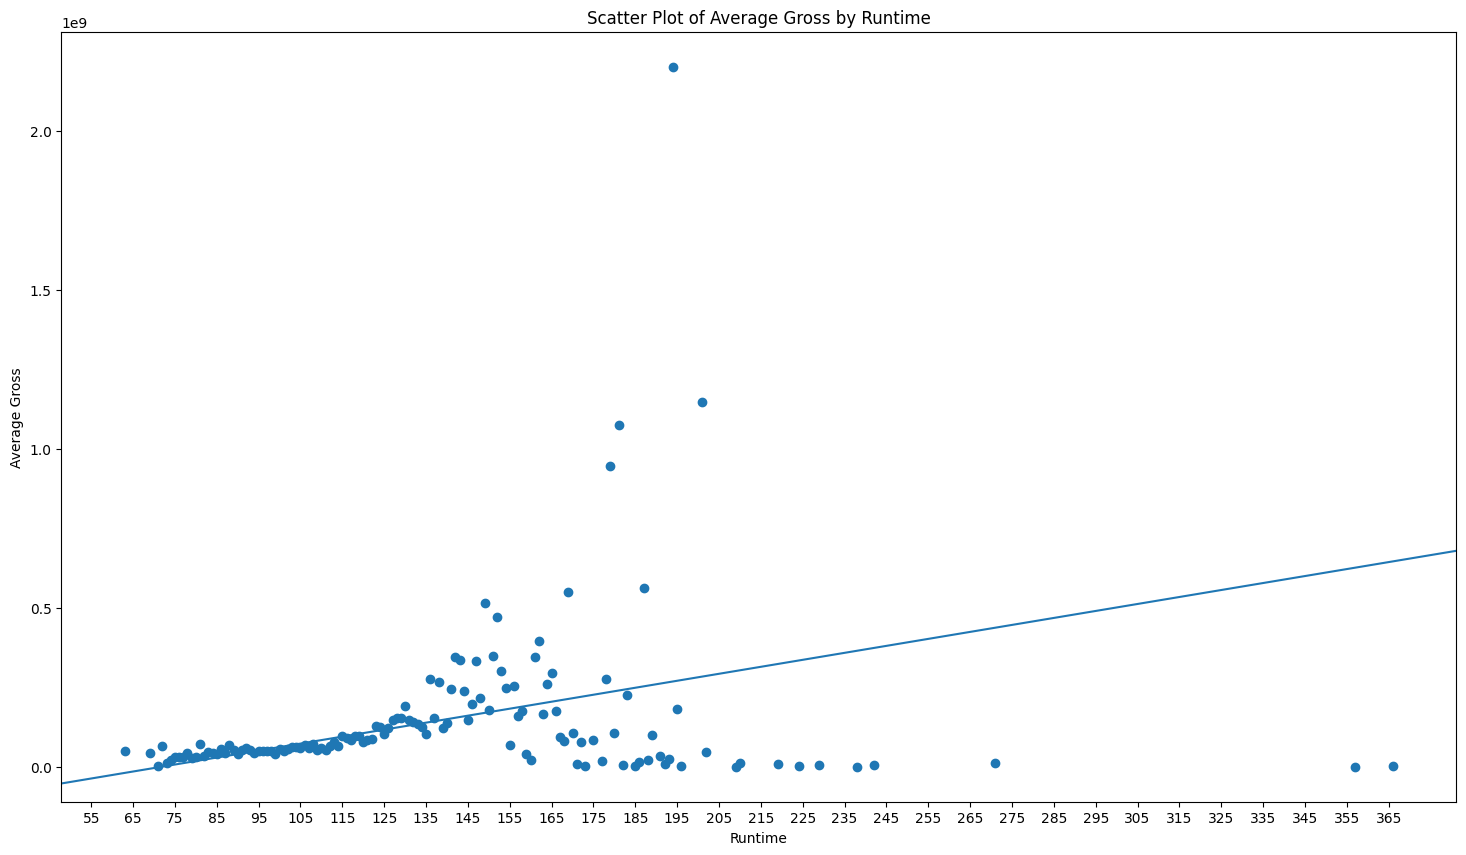

In [105]:
# Taking a look at average gross by runtime.

# Grouping the data set by "runtime" and taking the mean "gross" of each group.
average_gross_per_runtime = movie_data.groupby("runtime")["gross"].mean()

# Setting the size of the upcoming plot
fig, ax4 = plt.subplots(figsize=(18,10))

# Creating a scatter plot using the runtime as the x value and the average gross for that year as the y value.
ax4.scatter(average_gross_per_runtime.index, average_gross_per_runtime.values)

# Setting plot labels and the x tick amount
ax4.set_xticks(np.arange(float(min(movie_data["runtime"])), float(max(movie_data["runtime"])), 10.0))
ax4.set_xlabel("Runtime")
ax4.set_ylabel("Average Gross")
ax4.set_title("Scatter Plot of Average Gross by Runtime")

# Creating and plotting our linear regression line
runtime_model = smf.ols(formula="gross ~ runtime", data=movie_data)
abline_plot(model_results=runtime_model.fit(), ax=ax4)

# Showing the plot
plt.show()

<p>As we can see from the data, generally, average gross increases with runtime. We also see that there's not a lot of movies with greater than 200 minutes of runtime as after that runtime, the number of points starts to drop off. It's important to note that after about 155 minutes, we see a lot of points have a lower average gross. This means that businesses developing a movie would likely want to aim for around 155 minutes of runtime as that's about the area with the maximum average gross. Overall, we see that there is likely a correlation between runtime and average gross and we should investigate further. Doing yet another Ordinary Least Squares regression but with runtime as our independent variable and the null hypothesis as no relationship exists between runtime and gross, we get:</p>

In [106]:
# Setting up our runtime model, fitting our data, and printing our summary.
runtime_model = smf.ols(formula="gross ~ runtime", data=movie_data).fit()
runtime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     478.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          7.95e-103
Time:                        23:43:25   Log-Likelihood:            -1.5191e+05
No. Observations:                7478   AIC:                         3.038e+05
Df Residuals:                    7476   BIC:                         3.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.574e+08   1.09e+07    -14.379      0.000   -1.79e+08   -1.36e+08
runtime     2.195e+06      1e+05     21.870      0.000       2e+06    2.39e+06
==============================================================================
Omnibus:                     7599.397   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581245.664
Skew:                           4.953   Prob(JB):                         0.00
Kurtosis:                      45.039   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>As again, runtime is similar to release year as it's numerical and can increase, we see that it's linear regression summary is somewhat of the same. To find a movie's gross based on the runtime linear regression, you'd take the movie's runtime, multiply it by the runtime coefficient, and subtract by the intercept. That's useful for if a business wanted to calculate their projected gross for a movie with a given runtime. Similar to our past independent variables, we see that the "Prob (F-statistic)" value is 7.95e-103 which is again close to 0. So, we can comfortably reject the runtime null hypothesis and conclude that a relationship exists between runtime and gross. Runtime will also be included in our end model.</p>

<h4 id="budget"> Budget </h4>

<p>We're ending with our big hitter, budget. Budget is obviously a huge factor in the gross revenue of a movie. After all, the gross revenue is calculated from the budget. With a higher budget, more money must be earned for a higher gross revenue but also a higher quality movie is likely produced which should in theory make the movie perform better. Following a similar path as release year and runtime, we will be using a scatter plot to visualize our data but instead of average gross, we're just going to be looking at the raw budget vs gross data. Budget simply has too many values that it just wouldn't make sense to look at an average gross plot, it would likely be the same exact thing as the raw budget data. Seaborn seems to produce a slightly better looking plot for this one so we will be using that for our budget plot. The best fit line is also included in this plot. Taking a look at the following:</p>

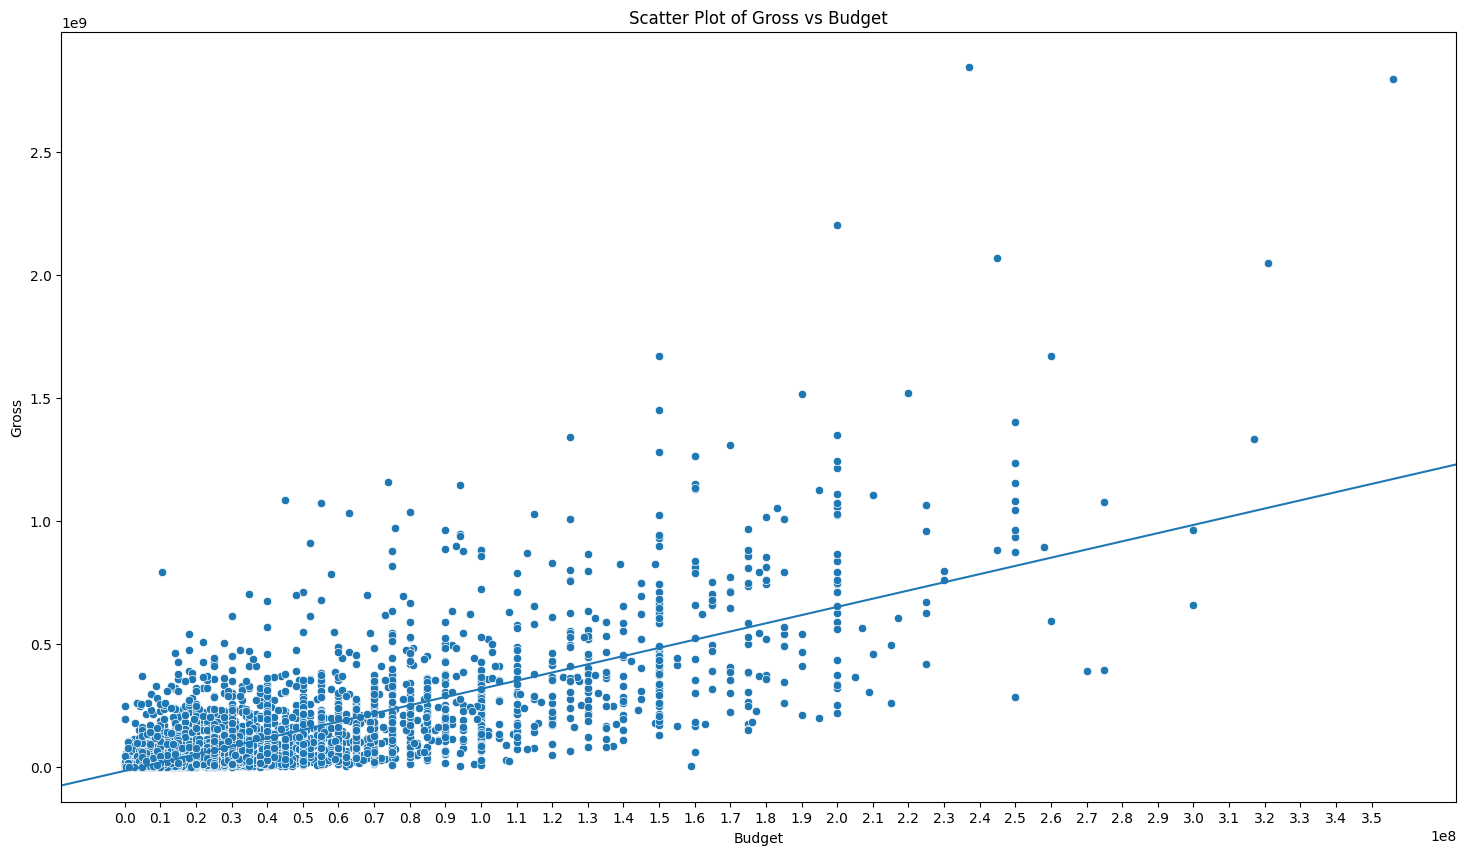

In [107]:
# Taking a look at gross vs budget.

# Setting the size of the upcoming plot
fig, ax5 = plt.subplots(figsize=(18,10))

# Creating a scatter plot using the budget as the x value and the gross for that budget as the y value.
sns.scatterplot(data=movie_data, x="budget", y="gross")

# Setting plot labels and the x tick amount
ax5.set_xticks(np.arange(float(min(movie_data["budget"])), float(max(movie_data["budget"])), 10000000.0))
ax5.set_xlabel("Budget")
ax5.set_ylabel("Gross")
ax5.set_title("Scatter Plot of Gross vs Budget")

# Creating and plotting our linear regression line
budget_model = smf.ols(formula="gross ~ budget", data=movie_data)
abline_plot(model_results=budget_model.fit(), ax=ax5)

# Showing the plot
plt.show()

<p>We see that there is evidence to say that a relationship likely exists between budget and the gross of a movie. As the best fit line is ever increasing, it's easy to say that a business should just choose the highest budget they can to create a movie but that's not a necessarily bullet proof plan. First, not even business can have a huge budget for a movie and second, there's not a lot of movies that have had a huge budget and thus it's hard to make a judgement on the higher budget data. There's obviously a lot more than can be done when it comes to data analysis on budgeting but we see that the general idea is that a higher budget gives a higher gross. Creating our final single independent variable linear regression, we're focusing on budget and our null hypothesis is that there is no relationship between budget and gross.</p>

In [108]:
# Setting up our budget model, fitting our data, and printing our summary.
budget_model = smf.ols(formula="gross ~ budget", data=movie_data).fit()
budget_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     6593.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:43:26   Log-Likelihood:            -1.0909e+05
No. Observations:                5436   AIC:                         2.182e+05
Df Residuals:                    5434   BIC:                         2.182e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.683e+07   2.26e+06     -7.459      0.000   -2.12e+07   -1.24e+07
budget         3.3343      0.041     81.198      0.000       3.254       3.415
==============================================================================
Omnibus:                     4615.159   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307629.633
Skew:                           3.670   Prob(JB):                         0.00
Kurtosis:                      39.115   Cond. No.                     7.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>For our budget regression, we see that our "Prob (F-statistic)" is 0. This means we can reject our null hypothesis and there is a relationship between budget and gross. This again, obviously makes sense but here we can see it coming to life with out plot and regression. Also, we see that in order to calculate a movie's gross based on the budget regression, we take a movie's budget, multiply it by the budget coefficient which is 3.3342, and subtract our intercept coefficient. Again, this is extremely useful for businesses as they could use a regression like this to see calculate the projected gross of a movie based on it's budget. Overall, we will clearly need to include budget in our final model.</p>

<h2 id="model_creation"> Model Creation </h2>

<h4 id="setup">Hypothesis and Model Setup </h4>

<p>From our exploritory data analysis, we can clearly see that release year, genre, rating, runtime, and budget all affect a movie's budget. Here, we will be creating a linear regression model that encapsulates all of those factors and we will be looking to evaluate it's performance by looking at the residuals of our actual data vs the projected data from our model. We'll get into the latter in a second but first, let's create our model and look at it's summary. The formula for this model will again include year, runtime, genre, rating, and budget as it's independent variables, and it will use gross as it's single dependent variable. We will also be using Ordinary Least Squares for this regression. Finally, our full and final null hypothesis will be that no relationship exists between a movie's year, runtime, genre, rating, and budget and it's gross. That is, the gross of a movie does not depend on it's year released, runtime, genre, rating, and budget.</p>

In [109]:
# Setting up our full model involving year, runtime, genre, rating, and budget, fitting our data, and printing our summary.
model = smf.ols(formula="gross ~ year + runtime + genre + rating + budget", data=movie_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     268.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:43:26   Log-Likelihood:            -1.0874e+05
No. Observations:                5423   AIC:                         2.175e+05
Df Residuals:                    5396   BIC:                         2.177e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.481e+09   3.72e+08     -3.977      0.000   -2.21e+09   -7.51e+08
genre[T.Adventure]   3.639e+06   7.99e+06      0.456      0.649    -1.2e+07    1.93e+07
genre[T.Animation]   6.907e+07   1.02e+07      6.771      0.000    4.91e+07    8.91e+07
genre[T.Biography]  -1.742e+07   8.22e+06     -2.119      0.034   -3.35e+07    -1.3e+06
genre[T.Comedy]      1.014e+07   4.93e+06      2.059      0.040    4.86e+05    1.98e+07
genre[T.Crime]      -3.578e+06   7.35e+06     -0.487      0.626    -1.8e+07    1.08e+07
genre[T.Drama]      -2.352e+06   5.74e+06     -0.410      0.682   -1.36e+07    8.89e+06
genre[T.Family]       3.71e+08   6.23e+07      5.952      0.000    2.49e+08    4.93e+08
genre[T.Fantasy]     1.556e+07   1.98e+07      0.787      0.431   -2.32e+07    5.43e+07
genre[T.History]    -5.443e-07   4.29e-07     -1.268      0.205   -1.39e-06    2.97e-07
genre[T.Horror]      4.545e+07   8.82e+06      5.152      0.000    2.82e+07    6.27e+07
genre[T.Music]      -2.377e-06   2.17e-06     -1.095      0.273   -6.63e-06    1.88e-06
genre[T.Musical]    -7.214e-07   9.49e-07     -0.760      0.447   -2.58e-06    1.14e-06
genre[T.Mystery]     3.097e+07   3.03e+07      1.022      0.307   -2.84e+07    9.04e+07
genre[T.Romance]    -3.078e+07   5.57e+07     -0.553      0.580    -1.4e+08    7.83e+07
genre[T.Sci-Fi]     -1.173e+07   5.08e+07     -0.231      0.817   -1.11e+08    8.78e+07
genre[T.Sport]       1.006e-06   8.46e-07      1.189      0.234   -6.52e-07    2.66e-06
genre[T.Thriller]    2.689e+07    4.7e+07      0.572      0.568   -6.53e+07    1.19e+08
genre[T.Western]     9.226e+06   8.78e+07      0.105      0.916   -1.63e+08    1.81e+08
rating[T.G]         -3.073e+07   1.25e+08     -0.246      0.806   -2.76e+08    2.14e+08
rating[T.NC-17]     -3.433e+07   1.29e+08     -0.265      0.791   -2.88e+08    2.19e+08
rating[T.Not Rated]  -4.08e+07   1.26e+08     -0.325      0.746   -2.87e+08    2.06e+08
rating[T.PG]        -2.898e+07   1.24e+08     -0.233      0.816   -2.73e+08    2.15e+08
rating[T.PG-13]      -3.06e+07   1.24e+08     -0.246      0.806   -2.74e+08    2.13e+08
rating[T.R]         -4.117e+07   1.24e+08     -0.331      0.740   -2.85e+08    2.02e+08
rating[T.TV-14]     -1.694e-08   1.04e-08     -1.628      0.104   -3.73e-08    3.46e-09
rating[T.TV-MA]      2.151e+08   1.52e+08      1.414      0.158   -8.32e+07    5.14e+08
rating[T.TV-PG]              0          0        nan        nan           0           0
rating[T.Unrated]   -1.859e+07   1.28e+08     -0.145      0.884   -2.69e+08    2.32e+08
rating[T.X]         -9.559e+07   1.76e+08     -0.544      0.586    -4.4e+08    2.49e+08
year                 6.989e+05   1.77e+05      3.953      0.000    3.52e+05    1.05e+06
runtime              9.545e+05   1.13e+05      8.484      0.000    7.34e+05    1.18e+06
bud

<p>As we can see in the summary, there are quite a few coefficient values. To break in down in simple terms, the summary show that in order to determine a movie's projected gross based on this linear regression, we must take follow the following equation. (year*the year coefficient) + (runtime*the runtime coefficient) + (budget*the budget coefficient) + the movie's rating's coefficient + the movie's genre's coefficient + the overall intercept coefficient. We'll see a full example of this in the conclusion in order to get an idea of how a business can calculate their full projected gross for a movie they want to make and what the optimal attributes are for a movie. Also, we see that the "Prob (F-statistic)" is 0 which makes sense as it was 0 for the budget as well but it important as we can then reject our null hypothesis and we can say that a movie's release year, runtime, genre, rating, and budget affect it's gross outcome. With this, we can then find what the optimal attributes are for those variables and we can find what makes a movie "good".</p>

<h4 id="evaluation">Model Evaluation </h4>

<p>In order to evaluate our model, we will be taking a look at a violin plot of the residuals from the model for each year. In terms of violin plots, you can learn more about them <a href="https://chartio.com/learn/charts/violin-plot-complete-guide/">here</a> but the general idea is that violin plots are used when you want to observe the distribution of numeric data across multiple groups. For our situation, we are using a violin plot in order to look at the distribution of the model residuals for each year. Residuals may be a unfamiliar concept to some readers so to define residuals in terms of a linear regression, residuals are the difference between an observed value (that is the actual gross for a movie) and the value predicted from the regression model (that is the predicted gross based on the movie's attributes). So for our situation, we'll be looking at the difference between the actual gross of a movie and the predicted gross of that movie based on our linear regression for each movie for each year which will create a distribution for each year to be plotted. Using each year's distribution, we can see the average residual for each year and check to make sure that it's around 0 as that means our linear regression is performing well. If the average residual for a year is around 0, that means that around the same number of points are above our "regression line" as there are below it which means our regression line is right in the middle which is where we want it.</p>

<p>In order to create our residual violin plot, we will first have to "wrangle" together our data. First, we will create a new column in our movie data title "model_resid" which will hold each movie's residual from the full linear model we have created. Then, we will create a list that holds the list of residuals for each movie for each specific year. That is, it will be a list of lists of residuals for each year. We'll go about creating this list by going through each entry in our data, checking if it's release year is the current year who's list we are currently creating and if so, add it's residual to the list. Once a year's list is finished, we add it to the overall list an continue. Finally, we create the violin plot using that big list and the corresponding list of unique years. This is all done below:</p>

In [110]:
# Creating the addition model_resid column in our pandas dataframe
movie_data["model_resid"] = model.resid

# Initially creating our list of residual lists and our list of unique years
model_residuals_per_year = []
model_years = movie_data["year"].unique()

# Going through each unique year and creating it's residual list to add it to the overall one
for year in movie_data["year"].unique():
    current_year_list = []
    # Checking if an entry in our database has the year we are looking for
    for row in movie_data[~movie_data['model_resid'].isnull()].iterrows():
        # If it does have the year we want, add it's residual to that year's list
        if(row[1]['year'] == year):
            current_year_list.append(row[1]["model_resid"])
    # Append the year's final residual list to our overall one
    model_residuals_per_year.append(current_year_list)

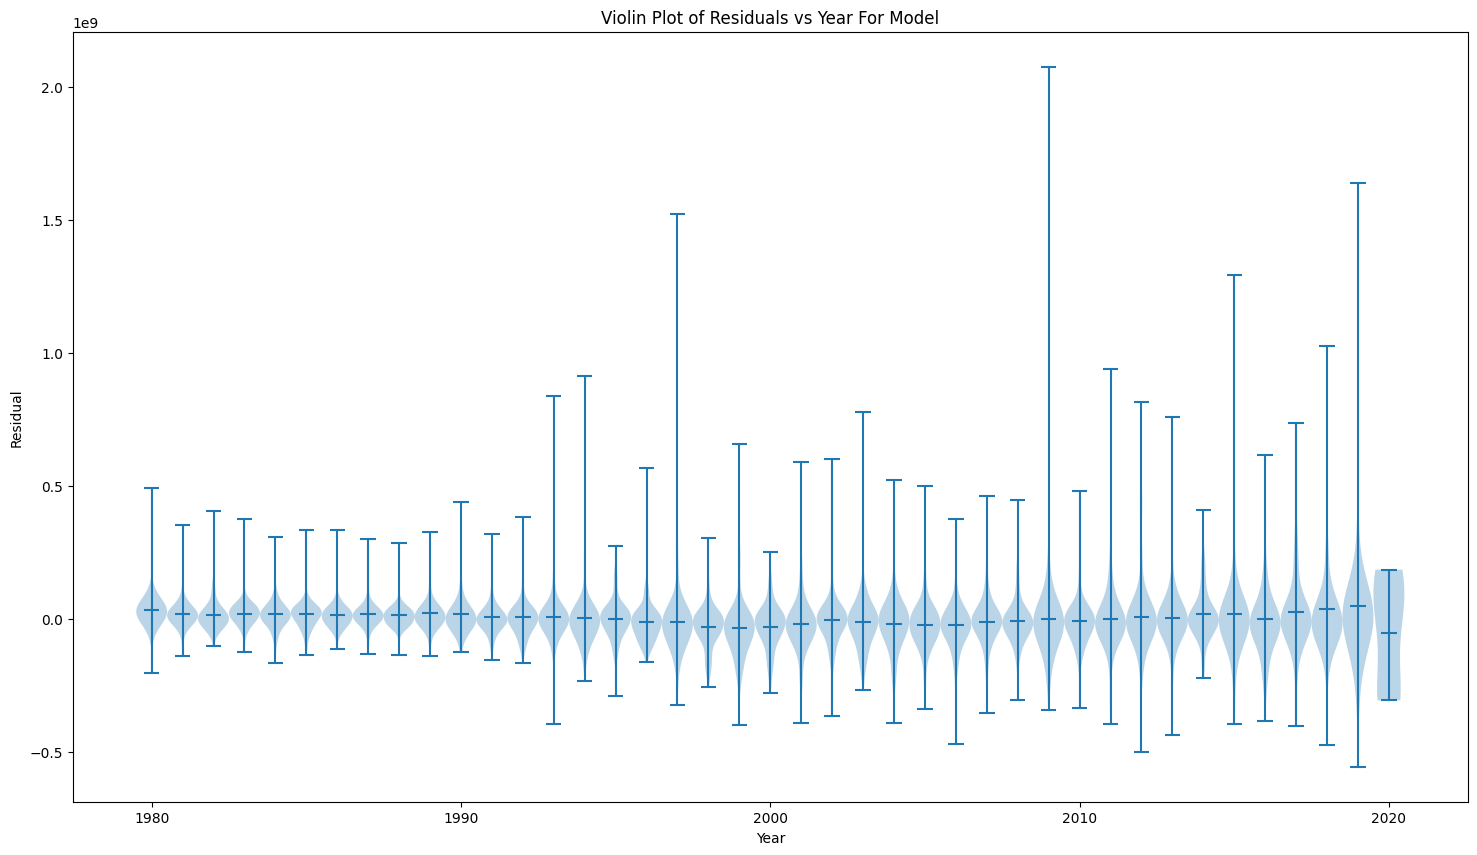

In [112]:
# Setting the size of the upcoming plot
fig, ax6 = plt.subplots(figsize=(18,10))

# Creating our violin plot of residuals per year in order to see each residual distribution
ax6.violinplot(model_residuals_per_year, model_years, widths = 1, showmeans=True)

# Setting plot labels and the x tick amount
ax6.set_xlabel("Year")
ax6.set_ylabel("Residual")
ax6.set_title("Violin Plot of Residuals vs Year For Model")

# Showing the plot
plt.show()

<p>In the violin plot above, the horizontal line in the middle of each year's "violin" is the average residual for that year. Around that line, you can see the distribution of the residuals for that year as well. The parts of the violin above and below that distribution show the range of the residual values. From this, we can see that the average residuals are all centered around 0 (with a slight exception for 2020 as COVID had some effects on the film industry) which is an indication that our model is performing well. The distributions for each year are also centered around 0 which is another indication that the model is performing well.</p>

<h2 id="conclusions"> Conclusions </h2>

<p>To finish out the project, we'll want to go over two main things. An example of using the linear model we have created where we try predicting a new and upcoming movie to see its real life use and the insights gained from the project. Let's start with the former.</p>


<h4 id="examples"> Example of Using The Linear Model </h4>

<p>Suppose you were Marvel Studios and you wanted to get an idea of how your new and upcoming movie "Ant-Man & The Wasp: Quantumania" will perform. As Marvel Studios, you may be concerned about the movie and want to be able to prepare early to move to making a different type of movie next time if the movie does not perform well. Using the linear model above, we can do exactly this. For the attributes of "Ant-Man & The Wasp: Quantumania", the movie will release in 2023, it's main genre is Action, the film is not yet rated but based on your previous ratings, you plan for it to be rated PG-13, its runtime is 135 minutes, and your budget is ~200 million dollars. Using pandas, we can create a new dataframe which only has the Ant-Man data, then using statsmodels, we can use our model to predict it's outcome. It will automatically pull the needed coefficients and do the calculation for us. </p>

In [129]:
# Creating the single entry dataframe
ant_man = pd.DataFrame(data={'year': [2023], 'genre': ["Action"], 'rating': ["PG-13"], 'runtime': [135.0], "budget": [200000000]})

# Predicting it's gross
ant_man_gross = model.predict(ant_man)

# Printing out it's gross
print("Ant-Man & The Wasp: Quantumania's project gross is:", ant_man_gross.loc[0])

Ant-Man & The Wasp: Quantumania's project gross is: 642715069.7500829


<p>So, as we can see, the projected gross is ~643 million dollars. Using this projected gross, Marvel Studios can make further decisions on if they would want to continue creating the type of movies they do and they also have something they could show to shareholders to further grow their business. There's many other uses for both the linear model and the project gross of a movie itself but this is just one example to show how using data science, we can create a real life application for something.</p>


<h4 id="insights"> Insights Gained and Closer </h4>

<p>Now it's time for the insights. First, we see that a relationship exists between a movie's gross revenue and it's year, genre, rating, runtime, and budget. It could also depend on other factors but we know for sure that it depends on those. Second, we can build a linear model based on those attributes in order to predict a movie's gross revenue. We've seen this with the linear model we created and the example above. Third, in order to create the optimal movie, you'd be looking for it to have be of the Animation, Family, Action, or Adventure genre in that order of priority, you'd want it to be rated TV-PG, PG-13, G, or PG in that order of priority, you'd want the runtime to be somewhere in the 135-155 minute range, and you'd want it to have the highest ideal budget for your business. We see that these values for each of these attribute's create a "good" or "above average" movie when it comes to gross revenue. </p>

<p>All in all, we have seen that any of these three insights can be useful for real life applications. There's obviously more than can be done with the data but hopefully this tutorial has brought a deeper understanding on how we can take data and manipulate it so that it is useful and insightful. If you are interested in digging deeper into data on movies or creating a more polished linear model, I encourage you to do so!</p>

<p>Last but not least, if you'd like to play around with anything in this tutorial itself, the Jupyter Notebook for the project can be found at <a href="https://github.com/jacoborndoff/jacoborndoff.github.io">https://github.com/jacoborndoff/jacoborndoff.github.io</a>. The database csv for the project can also be found there or like I mentioned at the beginning, at <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies">https://www.kaggle.com/datasets/danielgrijalvas/movies</a>.</p>